- **ipylernel** -> It provides a IPython kernel for Jupyter notebook.
- **python-dotenv** -> It reads key-value pairs from a .env file and can set then as an environment variables.
- **pypdf** -> need to install when using PyPDFLoader

Reference: https://python.langchain.com/docs/tutorials/rag/
### Retrieval Augmented Generation (RAG)
RAG is a technique for augmenting LLM knowledge with additional data. The process of bringing and inserting appropriate information into the model prompt is known as RAG. We can use this with both **unstructured and structured** data like SQL data.

A typical RAG application has two main components:
- **Indexing:** a pipeline for ingesting data from a source and indexing it. This usually happens offline.
    - **Load** means Data Ingestion
    - **Split** means Data Transformation-dividing into chunks
    - **Store** means VectorStore DB- embed and then store

    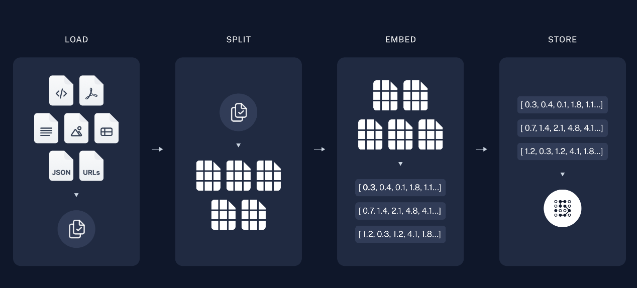
- **Retrieval and Generation:** the actual RAG chain, which takes the user query at run time and retrieves the relevant data from the index, then passes that to the model.
    - **Retrieve** means Retrieval chain, which is an inteface responsible for querying vector store db and get context info
    - **Generate** means pass the prompt and context info to get the final response

    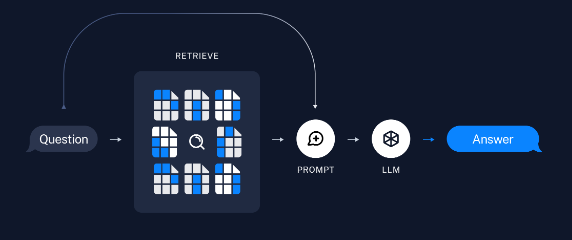

Reference: https://python.langchain.com/docs/integrations/document_loaders/

### Data Ingestion - DocumentLoaders
DocumentLoaders load data into the standard LangChain Document format. Each DocumentLoader has its **own specific parameters**, but they can all be invoked in the same way with the **.load()** method.
- **TextLoader:** to load any **.txt** files
- **PyPDFLoader:** to load any **.pdf** files
- **WebBaseLoader:** to load any **HTML web page** using url path
- **ArxivLoader:** to load any **research paper completely** using that paper code
- **WikipediaLoader:** to load any **wikipedia content completely** based on any topic

In [4]:
# TextLoader - loading a speech.txt file
from langchain_community.document_loaders import TextLoader

# providing the filepath in the loader
loader=TextLoader('files/speech.txt')

# invoking the loader by calling .load() method
txt_doc=loader.load()
txt_doc

[Document(metadata={'source': 'files/speech.txt'}, page_content='Generative artificial intelligence (generative AI, GenAI, or GAI) is a subset of artificial intelligence that uses generative models to produce text, images, videos, or other forms of data. These models often generate output in response to specific prompts. Generative AI systems learn the underlying patterns and structures of their training data, enabling them to create new data.\n\nImprovements in transformer-based deep neural networks, particularly large language models (LLMs), enabled an AI boom of generative AI systems in the early 2020s. These include chatbots such as ChatGPT, Copilot, Gemini and LLaMA, text-to-image artificial intelligence image generation systems such as Stable Diffusion, Midjourney and DALL-E, and text-to-video AI generators such as Sora.Companies such as OpenAI, Anthropic, Microsoft, Google, and Baidu as well as numerous smaller firms have developed generative AI models.')]

In [12]:
# PyPDFLoader - loading a summary.pdf file
from langchain_community.document_loaders import PyPDFLoader

# providing the filepath in the loader
loader=PyPDFLoader('files/summary.pdf')

# invoking the loader by calling .load() method
pdf_doc=loader.load()
print(pdf_doc)
print(type(txt_doc))

# If we're loading a large number of Documents, we can lazily load our Documents one at a time to minimize our memory footprint
docs = []
for doc in loader.lazy_load():
    docs.append(doc)

    if len(docs) >= 10:
        # do some paged operation, e.g.
        # index.upsert(doc)
        docs = []
len(docs)

[Document(metadata={'source': 'files/summary.pdf', 'page': 0}, page_content='1 | P a g e  \n \nPrinted Pages: Sub Code:  \nPaper Id:                                         Roll No.           \n \nNAME OF PROGRAM  \n(SEM ….) THEORY EXAMINATION 2019-20 \nSUBJECT NAME \nTime: 3 Hours        Total Marks: 100 \nNote:  1. Attempt all Sections. If require any missing data; then choose suitably. \n \nSECTION A \n1. Attempt all questions in brief.      2 x 10 = 20 \nQ no. Question Marks CO \na.  Explain two different usages of def in Python with examples. \n \n2 4 \nb.  Write a recursive Python program to print numbers from N to 1 (N >= \n1) in a single line, separated by space. \n \n2 5 \nc.  Describe the behavior of “ while” construct in Python with an \nExample. \n \n2 2 \nd.  Explain the difference between “break” and “continue” constructs \nin Python. \n \n2 2 \ne.  Write Python statement to create tuple containing a single eleme nt \n1054. \n \n2 1 \nf.  When evaluating a complicated exp

3

In [ ]:
# WebBaseLoader - loading a html web page 
from langchain_community.document_loaders import WebBaseLoader
import bs4

# this will load the entire url content
loader=WebBaseLoader('https://en.wikipedia.org/wiki/Generative_artificial_intelligence')
web_doc=loader.load()
print(web_doc)

# if we want to load only specific content like on the basis of classes used in html page
loaderSpecific=WebBaseLoader('https://en.wikipedia.org/wiki/Generative_artificial_intelligence', 
                             bs_kwargs=dict(parse_only=bs4.SoupStrainer(
                                 class_=("mw-page-title-main","vector-body-before-content")
                             )))
specific_class_loader=loaderSpecific.load()
specific_class_loader

[Document(metadata={'source': 'https://en.wikipedia.org/wiki/Generative_artificial_intelligence', 'title': 'Generative artificial intelligence - Wikipedia', 'language': 'en'}, page_content='\n\n\n\nGenerative artificial intelligence - Wikipedia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nJump to content\n\n\n\n\n\n\n\nMain menu\n\n\n\n\n\nMain menu\nmove to sidebar\nhide\n\n\n\n\t\tNavigation\n\t\n\n\nMain pageContentsCurrent eventsRandom articleAbout WikipediaContact us\n\n\n\n\n\n\t\tContribute\n\t\n\n\nHelpLearn to editCommunity portalRecent changesUpload file\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAppearance\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDonate\n\nCreate account\n\nLog in\n\n\n\n\n\n\n\n\nPersonal tools\n\n\n\n\n\nDonate Create account Log in\n\n\n\n\n\n\t\tPages for logged out editors learn more\n\n\n\nContributionsTalk\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n

[Document(metadata={'source': 'https://en.wikipedia.org/wiki/Generative_artificial_intelligence'}, page_content='Generative artificial intelligence\n\n\nFrom Wikipedia, the free encyclopedia\n')]

In [ ]:
# ArxivLoader - to load complete research paper using paper code
from langchain_community.document_loaders import ArxivLoader

loader=ArxivLoader(
    query='2411.09391',
    load_max_docs=2,
    # doc_content_chars_max=1000,
    # load_all_available_meta=False,
    )
arxiv_doc=loader.load()
arxiv_doc

arxiv_summary=loader.get_summaries_as_docs()
arxiv_summary

[Document(metadata={'Entry ID': 'http://arxiv.org/abs/2411.09391v1', 'Published': datetime.date(2024, 11, 14), 'Title': 'An Optimizing Just-In-Time Compiler for Rotor', 'Authors': 'João H. Trindade, José C. Silva'}, page_content='The Shared Source CLI (SSCLI), also known as Rotor, is an implementation of\nthe CLI released by Microsoft in source code. Rotor includes a single pass\njust-in-time compiler that generates non-optimized code for Intel IA-32 and IBM\nPowerPC processors. We extend Rotor with an optimizing just-in-time compiler\nfor IA-32. This compiler has three passes: control flow graph generation, data\ndependence graph generation and final code generation. Dominance relations in\nthe control flow graph are used to detect natural loops. A number of\noptimizations are performed during the generation of the data dependence graph.\nDuring native code generation, the rich address modes of IA-32 are used for\ninstruction folding, reducing code size and usage of register names. De

In [2]:
# WikipediaLoader - just provide any topic which you want to search on wikipedia 
from langchain_community.document_loaders import WikipediaLoader

loader=WikipediaLoader(
    query='gen ai',
    load_max_docs=2,
    lang='en',
    load_all_available_meta=False,
    doc_content_chars_max=100,
    )
wiki_doc=loader.load()
wiki_doc

[Document(metadata={'title': 'Generative artificial intelligence', 'summary': 'Generative artificial intelligence (generative AI, GenAI, or GAI) is a subset of artificial intelligence that uses generative models to produce text, images, videos, or other forms of data. These models often generate output in response to specific prompts. Generative AI systems learn the underlying patterns and structures of their training data, enabling them to create new data. \nImprovements in transformer-based deep neural networks, particularly large language models (LLMs), enabled an AI boom of generative AI systems in the early 2020s. These include chatbots such as ChatGPT, Copilot, Gemini, and LLaMA; text-to-image artificial intelligence image generation systems such as Stable Diffusion, Midjourney, and DALL-E; and text-to-video AI generators such as Sora. Companies such as OpenAI, Anthropic, Microsoft, Google, and Baidu as well as numerous smaller firms have developed generative AI models.\nGenerati

Reference: https://python.langchain.com/docs/concepts/text_splitters/

### Data Transformation - langchain_text_splitters

It involves breaking down large texts into smaller, manageable chunks. This process offers several benefits, such as ensuring consistent processing of varying document lengths, overcoming input size limitations of models, and improvind the quality of text representations used in retrieval systems. There are several strategies for splitting documents, each with its own advantages.

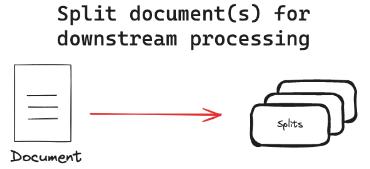

**Different Approches for text splitting**
- **CharacterTextSplitter:** Length-based: each chunk doesn't exceed a specified size limit
    - **Token-based:** split text based on the number of tokens
    - **Character-based:** split text based on the number of characters
- **RecursiveCharacterTextSplitter:** attempts to keep larger units(e.g., paragraph) intact. If a unit exceeds the chunk size.it moves to next level(e.g., sentences). This process continue down to the word level if necessary.
- **HTMLHeaderTextSplitter:** split texts at the HTML element level and adds metadata for each header "relevant" to any given chunk
- **RecursiveJsonSplitter:** split json data

NOTE: At last we want that the splitted chunks to be document format so there are some methods:
- **.split_text():** To obtain the string content directly, use .split_text()
- **.create_documents():** if the type of chunks is not odc then use this method as it will split the text and then convert it in document format. To create LangChain Document objects (e.g., for use in downstream tasks), use .create_documents()
- **.split_documents():** if the type of chunks is doc already then use this method to simply split it. 
- **.split_json():** split the json data into chunks



#### RecursiveCharacterTextSplitter

This text splitter is the recommended one for generic text. It is parameterized by a list of characters. It tries to split on them in order until the chunks are small enough. The default list is ["\n\n", "\n", " ", ""]. This has the effect of trying to keep all paragraphs ( and then sentences, and then words) together as long as possible, as those would generically seem to be the strongest semantically related pieces of text.
- How the text is split: by list of characters
- How the chunk size is measured: by number of characters

In [ ]:
# RecursiveCharacterTextSplitter - How to recursively split text by characters
from langchain_text_splitters import RecursiveCharacterTextSplitter

# creating the instance of text splitter
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=20
    )

# using .split_ducments()
split_texts=text_splitter.split_documents(txt_doc)
print(split_texts)

# using .create_documents()
speech=''
with open('files/speech.txt') as f:
    speech=f.read()
texts=text_splitter.create_documents([speech])
print(texts)

[Document(metadata={'source': 'files/speech.txt'}, page_content='Generative artificial intelligence (generative AI, GenAI, or GAI) is a subset of artificial'), Document(metadata={'source': 'files/speech.txt'}, page_content='of artificial intelligence that uses generative models to produce text, images, videos, or other'), Document(metadata={'source': 'files/speech.txt'}, page_content='videos, or other forms of data. These models often generate output in response to specific prompts.'), Document(metadata={'source': 'files/speech.txt'}, page_content='specific prompts. Generative AI systems learn the underlying patterns and structures of their'), Document(metadata={'source': 'files/speech.txt'}, page_content='structures of their training data, enabling them to create new data.'), Document(metadata={'source': 'files/speech.txt'}, page_content='Improvements in transformer-based deep neural networks, particularly large language models (LLMs),'), Document(metadata={'source': 'files/speech.txt

#### CharacterTextsplitter
This is the simplest method. This splits based on a given character sequence, which default to "\n\n". Chunk length is measured by number of characters.
- How the text is split: by single character separator
- How the chunk size is measured: by number of characters

In [ ]:
# Charactertextsplitter
from langchain_text_splitters import CharacterTextSplitter

char_splitter=CharacterTextSplitter(
    separator='\n\n',
    chunk_size=100,
    chunk_overlap=20
)
texts=char_splitter.split_documents(txt_doc)
print(texts)

# NOTE: Created a chunk of size 382, which is longer than the specified 100
# we got this as within 100 size it will not able to find the separator 

Created a chunk of size 382, which is longer than the specified 100


[Document(metadata={'source': 'files/speech.txt'}, page_content='Generative artificial intelligence (generative AI, GenAI, or GAI) is a subset of artificial intelligence that uses generative models to produce text, images, videos, or other forms of data. These models often generate output in response to specific prompts. Generative AI systems learn the underlying patterns and structures of their training data, enabling them to create new data.'), Document(metadata={'source': 'files/speech.txt'}, page_content='Improvements in transformer-based deep neural networks, particularly large language models (LLMs), enabled an AI boom of generative AI systems in the early 2020s. These include chatbots such as ChatGPT, Copilot, Gemini and LLaMA, text-to-image artificial intelligence image generation systems such as Stable Diffusion, Midjourney and DALL-E, and text-to-video AI generators such as Sora.Companies such as OpenAI, Anthropic, Microsoft, Google, and Baidu as well as numerous smaller firm

#### HTMLHeaderTextSplitter
HTMLHeaderTextSplitter is a "structure-aware" chunker that splits text at the HTML element level and adds metadata for each header "relevant" to any given chunk.It can be used with other text splitters as part of a chunking pipeline. It can return chunks element by element or combine element with the same metadata, with the objectives of:
- keeping related text grouped (more or less) semantically and 
- preserving context-rich information encoded in document structures

In [18]:
# HTMLHeaderTextSplitter
from langchain_text_splitters import HTMLHeaderTextSplitter

html_string="""
<!DOCTYPE html>
<html>
<body>

<h1>My First Heading</h1>
<h2>My First Heading</h2>
<h3>My First Heading</h3>
<p>My first paragraph.</p>

</body>
</html>
"""

html_url="https://www.w3schools.com/html/html_intro.asp"

headers_to_split_on=[
    ('h1','header 1'),
    ('h2','header 2'),
    ('h3','header 3'),
]

html_splitter=HTMLHeaderTextSplitter(headers_to_split_on)
html_split=html_splitter.split_text(html_string)
html_split_url=html_splitter.split_text_from_url(html_url)
print(html_split)
print(html_split_url)

[Document(metadata={'header 1': 'My First Heading', 'header 2': 'My First Heading', 'header 3': 'My First Heading'}, page_content='My first paragraph.')]
[Document(page_content='Tutorials Exercises Certificates Services Menu  \nSearch field  \n×  \n\ue80b  \nLog in Sign Up ★ +1 My W3Schools Get Certified Spaces For Teachers Plus Get Certified Spaces For Teachers Plus  \nMy W3Schools Spaces Get Certified Plus Academy Logout  \nTutorials  \n\xa0  \nExercises  \n\xa0  \nCertificates  \n\xa0  \nServices  \n\xa0  \n\uf30c \ue807 \ue806 \uf16d  \n×  \nTutorials  \nTutorials filter input  \n×  \nHTML and CSS'), Document(metadata={'header 3': 'HTML and CSS'}, page_content='Learn HTML Tutorial Reference  \nLearn CSS Tutorial Reference  \nLearn RWD Tutorial  \nLearn Bootstrap Overview  \nLearn W3.CSS Tutorial Reference  \nLearn Sass Tutorial Reference  \nLearn Colors Tutorial Reference  \nLearn Icons Tutorial Reference  \nLearn SVG Tutorial Reference  \nLearn Canvas Tutorial Reference  \nLearn G

#### RecursiveJsonSplitter
This json splitter splits json data while allowing control over chunk sizes. It traverses json data depth first and builds smaller json chunks. It attempts to keep nested json objects whole but will split them if needed to keep chunks between a min_chunk_size and the max_chunk_size.

If the value is not a nested json, but rather a very large string, the string will not be split. If you need a hard cap o the chunk size consider composing this with a Recursive text splitter on those chunks. There is an optional pre-processing step to split lists, by first converting them to json (dict) and then splitting them as such.
- How the text is split: json value
- How the chunk size is measured: by number of characters

In [ ]:
# loading json data from api
import json
import requests

json_data=requests.get('https://api.smith.langchain.com/openapi.json').json()
print(json_data)

{'openapi': '3.1.0', 'info': {'title': 'LangSmith', 'version': '0.1.0'}, 'paths': {'/api/v1/sessions/{session_id}': {'get': {'tags': ['tracer-sessions'], 'summary': 'Read Tracer Session', 'description': 'Get a specific session.', 'operationId': 'read_tracer_session_api_v1_sessions__session_id__get', 'security': [{'API Key': []}, {'Tenant ID': []}, {'Bearer Auth': []}], 'parameters': [{'name': 'session_id', 'in': 'path', 'required': True, 'schema': {'type': 'string', 'format': 'uuid', 'title': 'Session Id'}}, {'name': 'include_stats', 'in': 'query', 'required': False, 'schema': {'type': 'boolean', 'default': False, 'title': 'Include Stats'}}, {'name': 'accept', 'in': 'header', 'required': False, 'schema': {'anyOf': [{'type': 'string'}, {'type': 'null'}], 'title': 'Accept'}}], 'responses': {'200': {'description': 'Successful Response', 'content': {'application/json': {'schema': {'$ref': '#/components/schemas/TracerSession'}}}}, '422': {'description': 'Validation Error', 'content': {'appl

In [22]:
# RecursiveJsonSplitter
from langchain_text_splitters import RecursiveJsonSplitter

json_splitter=RecursiveJsonSplitter(max_chunk_size=300)

# split in json format
json_txt=json_splitter.split_json(json_data)
for json in json_txt[:3]:
    print(json)

# split in json doc format
json_doc=json_splitter.create_documents(texts=[json_data])
for json in json_doc[:3]:
    print(json)

# split in json string format
json_str=json_splitter.split_text(json_data)
for json in json_str[:3]:
    print(json)

{'openapi': '3.1.0', 'info': {'title': 'LangSmith', 'version': '0.1.0'}, 'paths': {'/api/v1/sessions/{session_id}': {'get': {'tags': ['tracer-sessions'], 'summary': 'Read Tracer Session', 'description': 'Get a specific session.'}}}}
{'paths': {'/api/v1/sessions/{session_id}': {'get': {'operationId': 'read_tracer_session_api_v1_sessions__session_id__get', 'security': [{'API Key': []}, {'Tenant ID': []}, {'Bearer Auth': []}]}}}}
{'paths': {'/api/v1/sessions/{session_id}': {'get': {'parameters': [{'name': 'session_id', 'in': 'path', 'required': True, 'schema': {'type': 'string', 'format': 'uuid', 'title': 'Session Id'}}, {'name': 'include_stats', 'in': 'query', 'required': False, 'schema': {'type': 'boolean', 'default': False, 'title': 'Include Stats'}}, {'name': 'accept', 'in': 'header', 'required': False, 'schema': {'anyOf': [{'type': 'string'}, {'type': 'null'}], 'title': 'Accept'}}]}}}}
page_content='{"openapi": "3.1.0", "info": {"title": "LangSmith", "version": "0.1.0"}, "paths": {"/

Reference: https://python.langchain.com/docs/concepts/embedding_models/

### Embedding: Text-to-vectors
Embedding models transform human language into a format that machines can understand and compare with speed and accuracy. These models take text as input and produce a fixed-length array of numbers, a numerical fingerprint of the text's semantic meaning. Embeddings allow search system to find relevant documents not just based on keyword matches, but on semantic understanding.

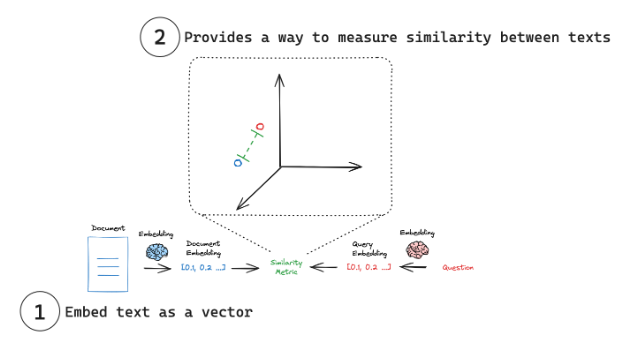

**Embedding Techniques**
- OpenAIEmbeddings
- OllamaEmbeddings
- HuggingFaceEmbeddings

Reference: https://platform.openai.com/docs/guides/embeddings#embedding-models

#### OpenAIEmbeddings
There are different model we can use to create embeddings using OpenAI

In [1]:
# loading all content from .env file 
import os
from dotenv import load_dotenv

# this will load all the content from the .env file to our coding environment
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [ ]:
from langchain_openai import OpenAIEmbeddings

# we can use any avaiable model in the docs of openai
embeddings=OpenAIEmbeddings(
    model='text-embedding-3-large',
    # dimensions=1024,    # optional
    )
print(embeddings)

text="creating openai embeddings"
query=embeddings.embed_query(text)
print(len(query))

client=<openai.resources.embeddings.Embeddings object at 0x00000134E00058E0> async_client=<openai.resources.embeddings.AsyncEmbeddings object at 0x00000134DFFEF620> model='text-embedding-3-large' dimensions=None deployment='text-embedding-ada-002' openai_api_version=None openai_api_base=None openai_api_type=None openai_proxy=None embedding_ctx_length=8191 openai_api_key=SecretStr('**********') openai_organization=None allowed_special=None disallowed_special=None chunk_size=1000 max_retries=2 request_timeout=None headers=None tiktoken_enabled=True tiktoken_model_name=None show_progress_bar=False model_kwargs={} skip_empty=False default_headers=None default_query=None retry_min_seconds=4 retry_max_seconds=20 http_client=None http_async_client=None check_embedding_ctx_length=True


In [ ]:
# creating and storing the embedding in chromadb
from langchain_community.vectorstores import Chroma

# pass the document and embedding technique which you want to use to create the provided doc into vector
# here split_texts is the result of RecursiveCharacterTextSplitter
db=Chroma.from_documents(split_texts,embeddings)
print(db)

In [ ]:
# querying the vector db
query='some question related to embedded document here split_texts'
retrieved_data=db.similarity_search(query)
print(retrieved_data)

Reference: https://ollama.com/search?c=embedding

#### OllamaEmbeddings
Ollama supports embedding models, making it possible to build retrieval augmented generation (RAG) application that combine text prompts with exsiting documents or other data. 
This is an open-source which provide llm models and embedding technique. To use this, we need to download "Ollama" from 'https://ollama.com' in our local device

So to use different models, we first need to install them particularly which we want to use using commands given in ollama github like if i want to use 'Llama 3' model then i need to run the command in command prompt 'ollama run llama3'

In [35]:
from langchain_community.embeddings import OllamaEmbeddings

# embedding created with mentioned model
embeddings=(
    OllamaEmbeddings(model='llama3')    # by default ir uses llama2
)
print(embeddings)

# use .embed_query() when passing single string
text="creating embedding using ollama model llama3"
result=embeddings.embed_query(text)
print(result)
print(len(result))

# use .embed_documents() when pass content of type doc or else pass list of strings
docs=['Alpha is 1st greek alphabet', 'Beta is 2nd greek alphabet']
res=embeddings.embed_documents(docs)
print(res)
print(len(res[0]))

base_url='http://localhost:11434' model='llama3' embed_instruction='passage: ' query_instruction='query: ' mirostat=None mirostat_eta=None mirostat_tau=None num_ctx=None num_gpu=None num_thread=None repeat_last_n=None repeat_penalty=None temperature=None stop=None tfs_z=None top_k=None top_p=None show_progress=False headers=None model_kwargs=None
[-1.6040492057800293, -0.490358829498291, -0.44777625799179077, 1.4363234043121338, 0.8775364756584167, 0.4424213469028473, -4.078797340393066, 1.8274869918823242, 0.5294336080551147, 0.10550273954868317, 0.20676586031913757, -0.5934898257255554, -0.021703844889998436, -3.0176751613616943, 0.29087600111961365, 4.52256441116333, -2.315201759338379, -1.4057419300079346, -3.777130365371704, 0.15627193450927734, 1.066765546798706, -1.330265760421753, 0.648210883140564, 0.30814239382743835, -0.10436441749334335, -1.3333144187927246, 1.447759985923767, 1.444501519203186, 4.227290153503418, 2.276916980743408, 2.0415117740631104, -0.20129743218421936,

Reference: https://huggingface.co/models

#### HuggingFaceEmbeddings
HuggingFace sentence-transformers is a Python framework for state-of-the-art sentence, text and image embeddings. One of the embeddings models is used in the HuggingFaceEmbeddings class. We have also added an alias for SentenceTransformerEmbeddings for users who are more fimilar with directly using that package.

In [2]:
# loading token from .env file
os.environ["HF_TOKEN"]=os.getenv("HF_TOKEN")

In [5]:
# from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.embeddings import HuggingFaceEmbeddings

model_name = "sentence-transformers/all-MiniLM-L6-v2"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': False}
embeddings=HuggingFaceEmbeddings(
    model_name=model_name,
    # model_kwargs=model_kwargs,
    # encode_kwargs=encode_kwargs
)
print(embeddings)

client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
) model_name='sentence-transformers/all-MiniLM-L6-v2' cache_folder=None model_kwargs={} encode_kwargs={} multi_process=False show_progress=False


In [6]:
# use .embed_query() when passing single string
text="creating embedding using huggingface sentence-transformers"
result=embeddings.embed_query(text)
print(result)
print(len(result))

# use .embed_documents() when pass content of type doc or else pass list of strings
docs=['Alpha is 1st greek alphabet', 'Beta is 2nd greek alphabet']
res=embeddings.embed_documents(docs)
print(res)
print(len(res[0]))

[-0.03728795424103737, 0.0008303963695652783, 0.06789054721593857, 0.023257799446582794, 0.026273034512996674, 0.08633136749267578, -0.029067901894450188, -0.025739550590515137, 0.01761360839009285, -0.05555384233593941, 0.028651151806116104, -0.06617633998394012, 0.04093869775533676, 0.033825017511844635, 0.03490045666694641, 0.07421170920133591, 0.03616311773657799, 0.07222679257392883, -0.05746239051222801, 0.0038969984743744135, 0.012383674271404743, 0.061819933354854584, 0.053200189024209976, -0.086797334253788, 0.014035910367965698, 0.07586850225925446, 0.012665578164160252, 0.005908150225877762, 0.14984819293022156, 0.0038302189204841852, 0.019513653591275215, -0.04498990625143051, -0.03848952054977417, 0.07694662362337112, -0.022036200389266014, 0.1019897535443306, 0.006035632453858852, 0.05810803547501564, -0.07353433966636658, -0.007969443686306477, -0.015385950915515423, 0.023714782670140266, 0.026285968720912933, 0.0017559053376317024, 0.09522233158349991, -0.01689855940639